# Data description
The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Attributes
Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : % of total display area in store allocated to this product

Item_Type : Category to which product belongs

Item_MRP : Maximum Retail Price (list price) of product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : Year in which store was established

Outlet_Size : Size of the store

Outlet_Location_Type : Type of city in which store is located

Outlet_Type : Grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.

# Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
df = pd.read_csv('D:/Data/1/Big_mart.csv')
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [138]:
# Finding the missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [139]:
#we will fill the missing values of the column Item_Weight by 
#filling the null values with the mean values, And Outlet_Size by 'missing' 
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [140]:
#We perform a small feature engineering for the columns Item_Fat_Content and Item_Visibility
#Here we replace the strings having similar meaning such as LF and low fat with Low Fat and reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','lf':'Low Fat','low fat':'Low Fat'})

In [141]:
#Here we fill the values in Item_Visibility column having 0 with the mean values.
df['Item_Visibility'] = df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

# Exploratory Data analysis

**Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe.

It takes data, summarizes that data and finds patterns in the data.The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the **Bivaraite/Multivariate** analysis.

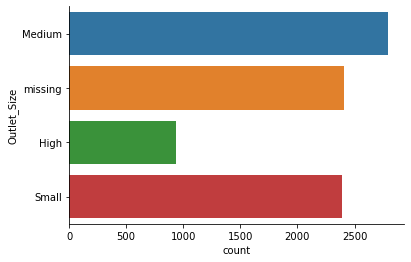

In [142]:
#Outlet_Size - Count plot
#From the plot we can infer that a lot of stores of bigmart have not participated in the survey
#The number of medium sized and small sized stores are high in number
#Stores which are large are very few in number
sns.countplot(y="Outlet_Size", data=df)
sns.despine()

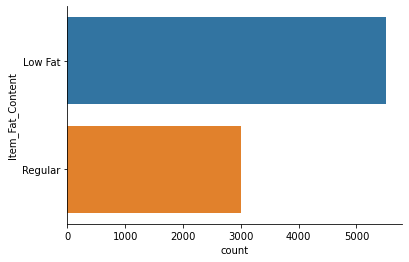

In [143]:
#Item_Fat_Content - Count Plot
#The stores have only 2 categories for the Fat_Content.
#Items in the Low Fat category are more in number as comapared to Regular ones.
sns.countplot(y = 'Item_Fat_Content', data = df)
sns.despine()

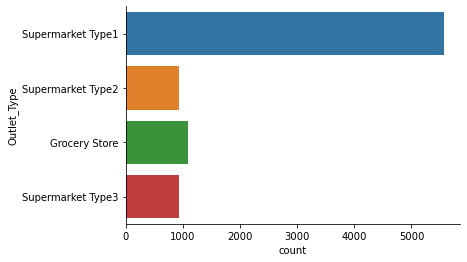

In [144]:
#Outlet_Type - Count PLot
#Number of stores of Supermarket Type1 is high.
#From this plot we infer that the Grocery Store are the 2nd most common type of stores.
#Stores of other types i.e. Supermarket Type2 and Supermarket Type3 are few in number.
sns.countplot(y = 'Outlet_Type', data = df)
sns.despine()

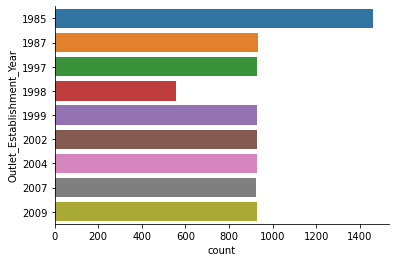

In [145]:
#Outlet_Establishment_Year - Count Plot
#From the plot we can infer that most no. of Stores were established in the year 1985.
#Every year from 1985-2009 the number of stores established are same except 1985 and 1988.
#Number of stores established in the year 1988 is drastically low.
sns.countplot(y = 'Outlet_Establishment_Year', data = df)
sns.despine()

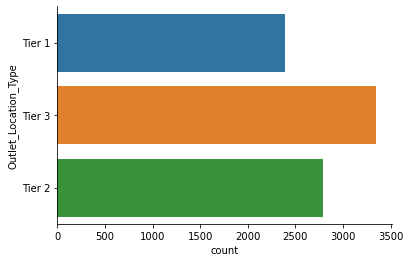

In [146]:
#Outlet_Location_Type - Count Plot
#Tier 1(most urban) locations have the least number of stores.
#Tier 3 locations have most number of stores.
sns.countplot(y = 'Outlet_Location_Type', data = df)
sns.despine()

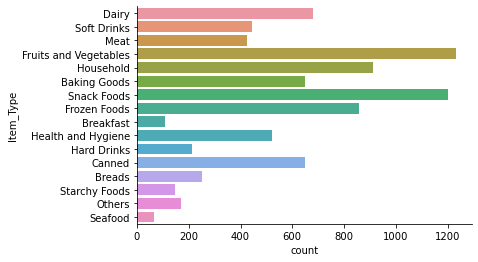

In [147]:
#Item_Type - Count Plot
#From the plot we can infer that the quantity of seafood item is the least.
#The quantity of 'Fruits and Vegetables' and 'Snack Foods' are very high.
#So we can infer that the items having large qauntites of stock are consumed highly.
sns.countplot(y = 'Item_Type', data = df)
sns.despine()

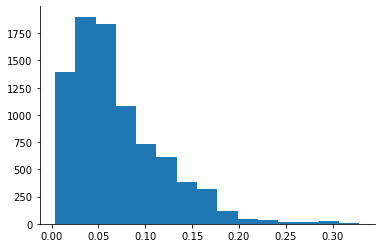

In [148]:
#Item_Visibility - Count plot
#From the plot we can observe that it is left skewed.
#Item visibility from 0.01 to 0.10 is high.
plt.hist(x = 'Item_Visibility',data = df,bins = 15)
plt.rc("axes.spines", top=False, right=False)

**Bivariate Analysis**

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

In [149]:
#co-relation
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


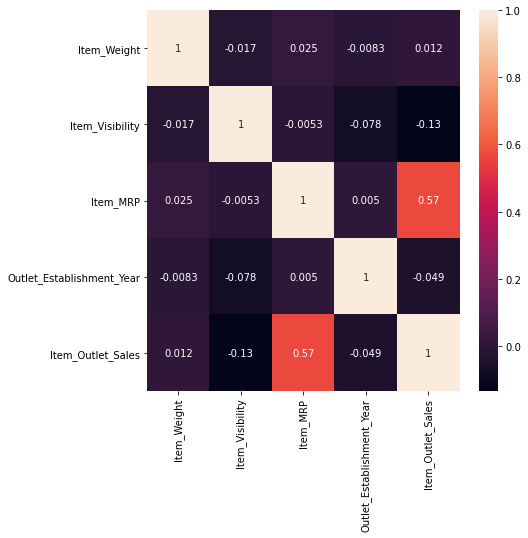

In [150]:
plt.figure(figsize =(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

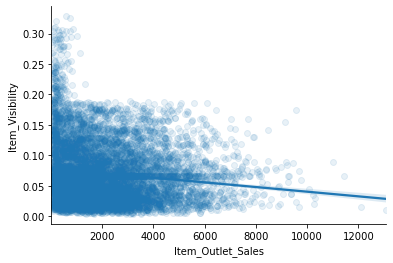

In [151]:
#Item_Outlet_Sales vs Item_Visibility
#We comapre Item_Outlet_Sales and Item_Visibility
#From the plot we can observe a decreasing trend.
#Most number of sample data are present in the visibility range of 0.05 to 0.15
sns.regplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

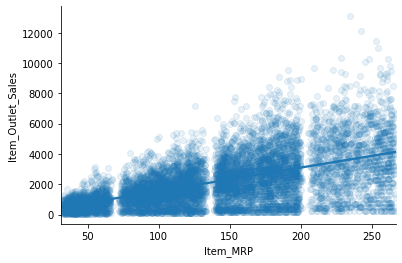

In [152]:
#Item_MRP vs Item_outlet_Sales
#We compare the Item_MRP with the Item_Outlet_Sales
#From the plot we can infer that there is an increasing trend observed.
#We also can see that high MRP goods have high sales.
#The number of samples for high MRP goods is less in number.
sns.regplot(x = 'Item_MRP',y ='Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

**Multi-Variate Analysis**

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

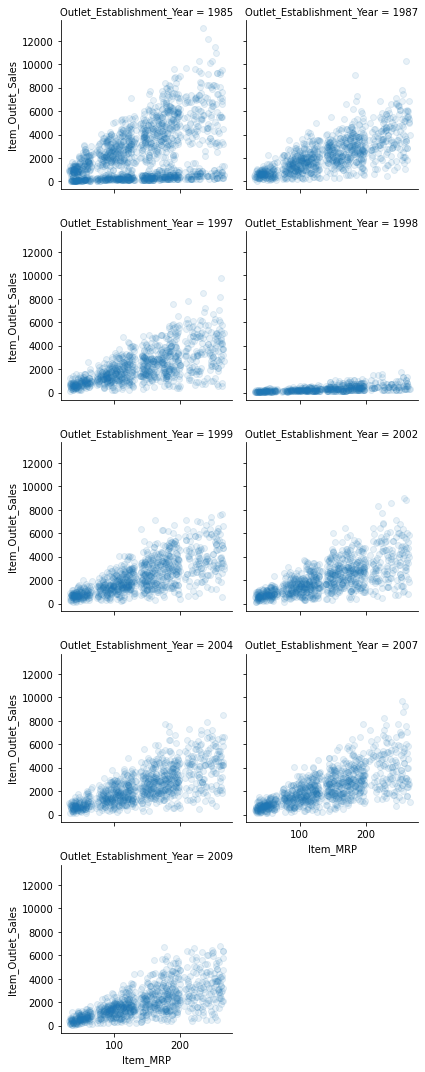

In [153]:
#Item_Outlet_Sales vs Item_MRP in terms of Outlet_Establishment_Year
#From the plots below we can infer that most no. of samples are present for establishment year 1985. 
#We can also observe that items having higher MRP have higher outlet sales.
grid = sns.FacetGrid(df, col='Outlet_Establishment_Year',col_wrap = 2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.1)
sns.despine()

In [154]:
df.head(9)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986


In [155]:
# Number of unique names in each colomn
for col in df.columns:
    #print(col)
    #print(df[col].unique()[:5])
    print( col ,'\t\t',df[col].nunique())

Item_Identifier 		 1559
Item_Weight 		 416
Item_Fat_Content 		 2
Item_Visibility 		 7880
Item_Type 		 16
Item_MRP 		 5938
Outlet_Identifier 		 10
Outlet_Establishment_Year 		 9
Outlet_Size 		 4
Outlet_Location_Type 		 3
Outlet_Type 		 4
Item_Outlet_Sales 		 3493


In [156]:
#convert the string datatypes of certain columns to numeric ones .. Encoder ,, OR we can use dummy variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

li = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier']
for i in li:
    df[i] = le.fit_transform(df[i])
    
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.138


We create dummy columns for the column Outlet_Identifier and drop the columns which are not required for our training purpose along with the label column

In [157]:
df = pd.get_dummies(df, columns=['Outlet_Identifier'])
#df = pd.concat([df,dum],axis=1)

y = df['Item_Outlet_Sales']

x = df.drop(columns=['Item_Identifier','Item_Weight','Item_Outlet_Sales','Item_Type','Outlet_Establishment_Year'])

# Creating and Training the model

In [162]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20,random_state = 101)

In [163]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [164]:
reg.fit(x_train,y_train)

LinearRegression()

In [165]:
y_pred=reg.predict(x_test)

Text(0, 0.5, 'Predicted Y')

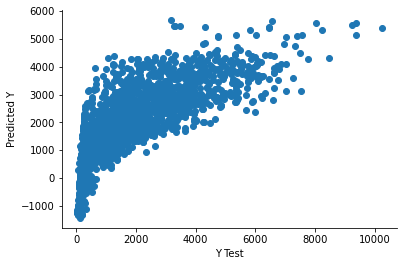

In [166]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [167]:
reg.score(x_test,y_test)

0.5584692833598521

# Trying K-Fold Cross Validation

In [168]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [169]:
models = []
models.append(('LR', LinearRegression())) 
models.append(('GBR', GradientBoostingRegressor(n_estimators = 100)))
models.append(('RF', RandomForestRegressor(n_estimators = 50)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x, y, cv=kfold) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f " % (name, np.mean(np.absolute(results)))
    print(msg)

LR: 0.56 
GBR: 0.58 
RF: 0.57 


# Normal training without k-fold

In [175]:
# Fitting and score of LR
models[0][1].fit(x_train,y_train)
models[0][1].score(x_test, y_test)

0.5584692833598521

In [176]:
# Fitting and score of GBR
models[1][1].fit(x_train,y_train)
models[1][1].score(x_test, y_test)

0.597455673016016

In [177]:
# Fitting and score of RF
models[2][1].fit(x_train,y_train)
models[2][1].score(x_test, y_test)

0.5266681938888376

# Conclusion :-
We were given a dataset of Bigmart for predicting it's output sales.We proceed first with handling missing values in the dataset as it may have a effect on our prediction of output sales. Then we perform the first feature engineering for the dataset.

Now we explore the data through visualisations using required packages plotting some graphs and making inferences about our dataset from them.

After the EDA we perform some feature engineering for the second time this time for passing the columns to the models.Now we use some models available in the sklearn module of Python for our prediction of output sales.

The first model we use is Linear Regression

accuracy : 0.56

The Second model we use is GradientBoostingRegressor

accuracy : 0.60

The third model used is RandomForestRegressor

accuracy : 0.52

From the above three models which have been used for analysis we find that GradientBoostingRegressor is the best among the three.